In [ ]:
### A small example with 6 mentors and 32 mentees.
### Matching Mentors Mentees
## sentence-transformers/all-MiniLM-L6-v2
## https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
## Main page https://huggingface.co/sentence-transformers
## "This is a sentence-transformers model: It maps sentences & paragraphs
## to a 384 dimensional dense vector space and can be used for tasks
## like clustering or semantic search."

## I've generated 2 example CSV files with 6 mentors and 32 mentees.
## Mentors and mentees have a "name_id" , "keywords" and "description"
## I've used a sentence transformer to extract features and do the pairing.
## In this example, the all-MiniLM-L6-v2 transformers looks for semantic similarities
## and evaluates "keywords" and "description"

## The "framework"
## Github https://github.com/varlottaang/matching
## CSV Mentors https://github.com/varlottaang/matching/blob/main/mentors.csv
## CSV Mentees https://github.com/varlottaang/matching/blob/main/mentees.csv

## "climate modeling", "climate system", "ocean reanalysis", "atmosphere reanalysis", "paleoclimate",
## "extremes and vulnerability", "adaptation and impact", "IPCC", "climate response", "climate future",
## "climate data", "heatwaves", "wildfires", "precipitations", "ENSO", "land use",
## "ocean acidification", "sea level rise"

In [ ]:
# install sentence transformer 🚚
!pip install -U sentence-transformers

In [ ]:
# import packages 📦
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

In [ ]:
# Load CSV files
mentors_df = pd.read_csv('small_mentors.csv')
mentees_df = pd.read_csv('small_mentees.csv')

# Extract names, keywords, and descriptions
mentors = mentors_df[['name_id', 'keywords', 'description']]
mentees = mentees_df[['name_id', 'keywords', 'description']]

In [ ]:
## Load Model sentence-transformers/all-MiniLM-L6-v2🤗

In [ ]:
# Load pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to compute embeddings for both keywords and description
def compute_embeddings(keywords, descriptions):
    keyword_embeddings = model.encode(keywords, convert_to_tensor=True)
    description_embeddings = model.encode(descriptions, convert_to_tensor=True)
    return keyword_embeddings + description_embeddings

# Compute embeddings for mentors and mentees
mentor_embeddings = compute_embeddings(mentors['keywords'], mentors['description'])
mentee_embeddings = compute_embeddings(mentees['keywords'], mentees['description'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
## Matching 🧩

In [ ]:
# Dictionary to keep track of mentor matches
mentor_match_count = {mentor: 0 for mentor in mentors['name_id']}

# Set of all mentee names, to look for unmatch later
unmatched_mentees = set(mentees['name_id'])

# Set the desired number of matches for each mentor
# Divide the total number of mentees by the number of mentors
# The result // is an integer
matches_per_mentor = len(mentees) // len(mentors)

# Match mentors and mentees
matches_with_scores = []
for mentee_idx, mentee_embedding in enumerate(mentee_embeddings):
    # Compute cosine similarity
    similarities = util.cos_sim(mentee_embedding, mentor_embeddings)[0]

    # Iterate over similarities to find an available mentor
    for best_match_idx in similarities.argsort(descending=True):
        best_match_idx = best_match_idx.item()  # Convert to integer
        mentor_name = mentors['name_id'].iloc[best_match_idx]

        # Check if mentor has not exceeded the desired match limit
        if mentor_match_count[mentor_name] < matches_per_mentor:
            mentee_name = mentees['name_id'].iloc[mentee_idx]
            similarity_score = similarities[best_match_idx].item()

            matches_with_scores.append((mentee_name, mentor_name, similarity_score))
            mentor_match_count[mentor_name] += 1
            # Remove matched mentee from the set
            unmatched_mentees.discard(mentee_name)
            break


In [ ]:
# Print the matches Mentees-Mentors with similarity scores
for mentee, mentor, score in matches_with_scores:
    print(f"Mentee: {mentee} is best matched with Mentor: {mentor} (Similarity Score: {score:.4f})")

Mentee: Mentee_1 is best matched with Mentor: Mentor_1 (Similarity Score: 0.7455)
Mentee: Mentee_2 is best matched with Mentor: Mentor_2 (Similarity Score: 0.8162)
Mentee: Mentee_3 is best matched with Mentor: Mentor_1 (Similarity Score: 0.8556)
Mentee: Mentee_4 is best matched with Mentor: Mentor_2 (Similarity Score: 0.8253)
Mentee: Mentee_5 is best matched with Mentor: Mentor_6 (Similarity Score: 0.8410)
Mentee: Mentee_6 is best matched with Mentor: Mentor_4 (Similarity Score: 0.7557)
Mentee: Mentee_7 is best matched with Mentor: Mentor_3 (Similarity Score: 0.8149)
Mentee: Mentee_8 is best matched with Mentor: Mentor_3 (Similarity Score: 0.7483)
Mentee: Mentee_9 is best matched with Mentor: Mentor_3 (Similarity Score: 0.7754)
Mentee: Mentee_10 is best matched with Mentor: Mentor_1 (Similarity Score: 0.8317)
Mentee: Mentee_11 is best matched with Mentor: Mentor_2 (Similarity Score: 0.7820)
Mentee: Mentee_12 is best matched with Mentor: Mentor_2 (Similarity Score: 0.8655)
Mentee: Mente

In [ ]:
## Save Mentors-Mentees Matching as a CSV 👩‍🏫🧑🏿‍🏫👨🏻‍🏫👩🏽‍🎓👨‍🎓🧑🏻‍🎓

In [ ]:
# Convert the list of matches to a DataFrame
matches_df = pd.DataFrame(matches_with_scores, columns=['Mentee', 'Mentor', 'Similarity Score'])

# Save the DataFrame to a CSV file
matches_df.to_csv('mentee_mentor_matches.csv', index=False)

In [ ]:
## Spot lonely Mentors, print and save a CSV 💫

In [ ]:
# Identify and print unpaired mentors
unpaired_mentors = [mentor for mentor, count in mentor_match_count.items() if count == 0]
print("Unpaired Mentors:")
for mentor in unpaired_mentors:
    print(mentor)

# Convert the list of unpaired mentors to a DataFrame
unpaired_mentors_df = pd.DataFrame(unpaired_mentors, columns=['Unpaired Mentor'])

# Save the DataFrame of unpaired mentors to a CSV file
unpaired_mentors_df.to_csv('unpaired_mentors.csv', index=False)

Unpaired Mentors:


In [ ]:
## Unmatched Mentees (Home Alone) 🏡
## Print and save a CSV

In [ ]:
# Print and save the unmatched mentees
print("Unmatched Mentees:")
for mentee in unmatched_mentees:
    print(mentee)

# Convert the set of unmatched mentees to a DataFrame
unmatched_mentees_df = pd.DataFrame(list(unmatched_mentees), columns=['Unmatched Mentee'])

# Save the DataFrame of unmatched mentees to a CSV file
unmatched_mentees_df.to_csv('unmatched_mentees.csv', index=False)

Unmatched Mentees:
Mentee_31
Mentee_32


In [ ]:
# Reset match count for mentors
mentor_match_count = {mentor: 0 for mentor in mentors['name_id']}

# Match mentors and remaining unmatched mentees
remaining_matches_with_scores = []
for mentee_idx, mentee_embedding in enumerate(mentee_embeddings):
    # If the mentee is already matched, skip to the next one
    if mentees['name_id'].iloc[mentee_idx] not in unmatched_mentees:
        continue

    # Compute cosine similarity
    similarities = util.cos_sim(mentee_embedding, mentor_embeddings)[0]

    # Iterate over similarities to find an available mentor
    for best_match_idx in similarities.argsort(descending=True):
        best_match_idx = best_match_idx.item()  # Convert to integer
        mentor_name = mentors['name_id'].iloc[best_match_idx]

        # Check if mentor has not exceeded the desired match limit
        if mentor_match_count[mentor_name] < matches_per_mentor:
            mentee_name = mentees['name_id'].iloc[mentee_idx]
            similarity_score = similarities[best_match_idx].item()

            remaining_matches_with_scores.append((mentee_name, mentor_name, similarity_score))
            mentor_match_count[mentor_name] += 1
            # Remove matched mentee from the set
            unmatched_mentees.discard(mentee_name)
            break

In [ ]:
# Print the remaining matches Mentees-Mentors with similarity scores
for mentee, mentor, score in remaining_matches_with_scores:
    print(f"Remaining Match - Mentee: {mentee} is matched with Mentor: {mentor} (Similarity Score: {score:.4f})")

Remaining Match - Mentee: Mentee_31 is matched with Mentor: Mentor_3 (Similarity Score: 0.7969)
Remaining Match - Mentee: Mentee_32 is matched with Mentor: Mentor_1 (Similarity Score: 0.8383)


In [ ]:
# Convert the list of matches to a DataFrame
matches_df = pd.DataFrame(remaining_matches_with_scores, columns=['Mentee', 'Mentor', 'Similarity Score'])

# Save the DataFrame to a CSV file
matches_df.to_csv('remaining_matches_with_scores.csv', index=False)

In [ ]:
## Data Visualization

In [ ]:
# Visualize Number of mentees per mentor
# This is a visualization just for matches_with_scores, without the unmatched mentees

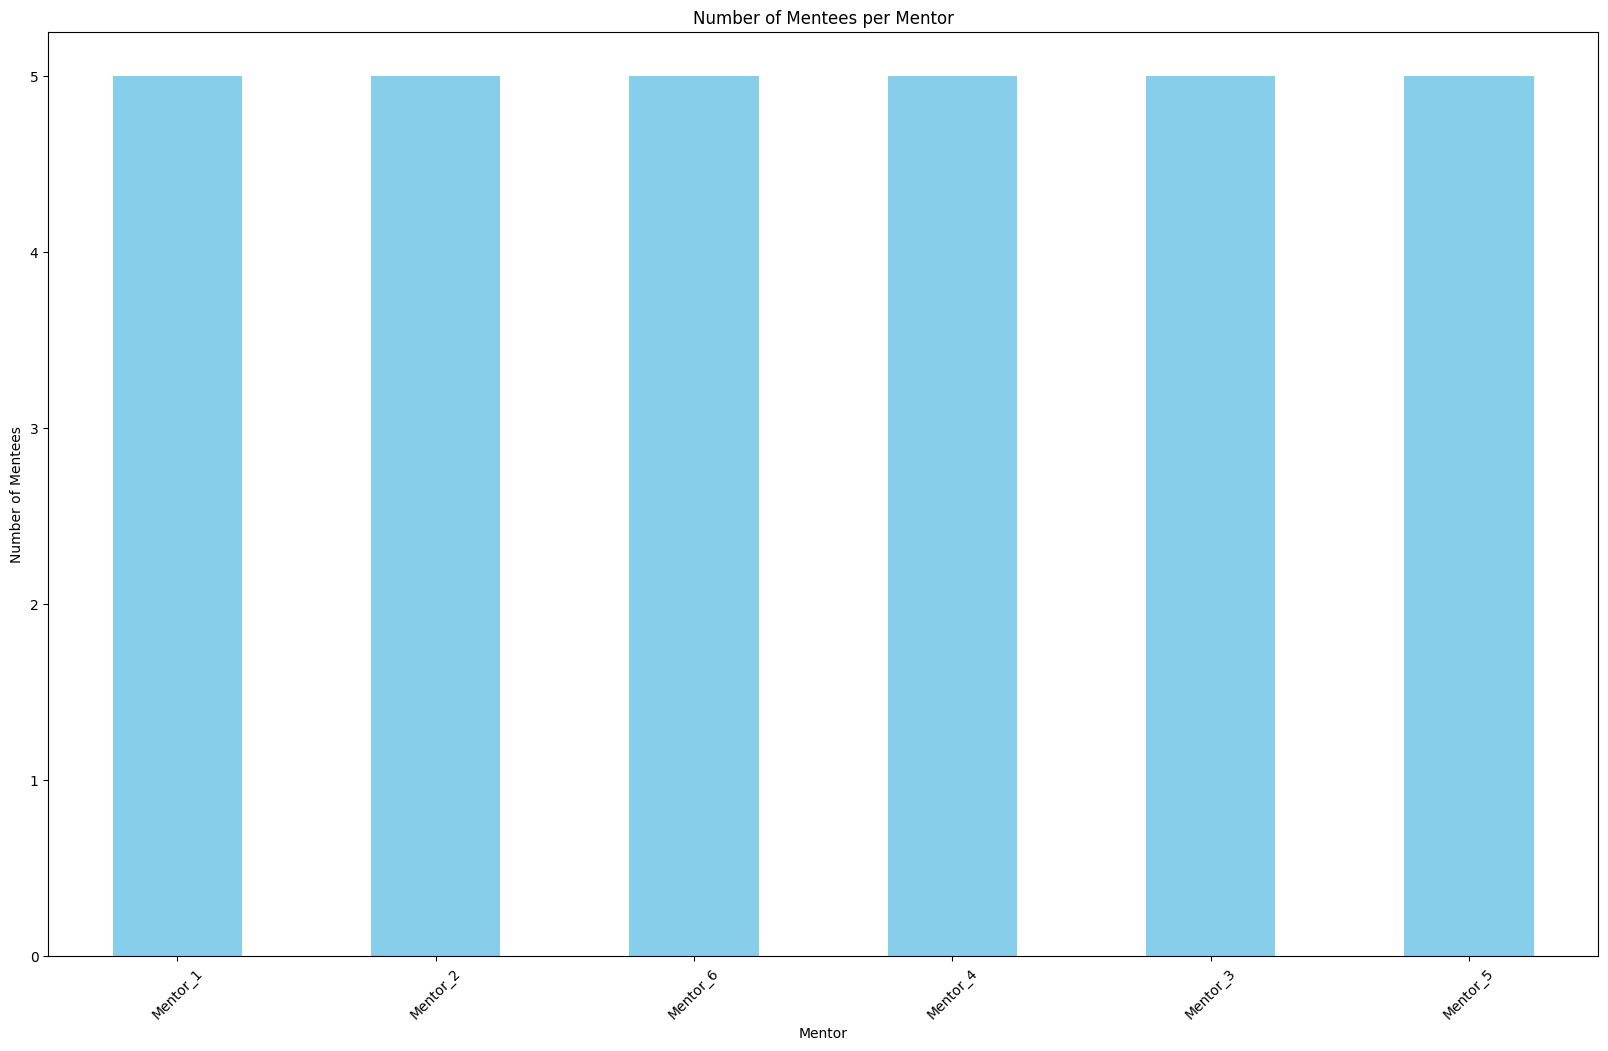

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the list of matches to a DataFrame
matches_df = pd.DataFrame(matches_with_scores, columns=['Mentee', 'Mentor', 'Similarity Score'])
# Count the number of mentees for each mentor
mentee_count_per_mentor = matches_df['Mentor'].value_counts()

# Plot the distribution
mentee_count_per_mentor.plot(kind='bar', figsize=(20, 12), color='skyblue')

plt.title('Number of Mentees per Mentor')
plt.xlabel('Mentor')
plt.ylabel('Number of Mentees')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# WordCloud from CSV files ☁️☁️☁️

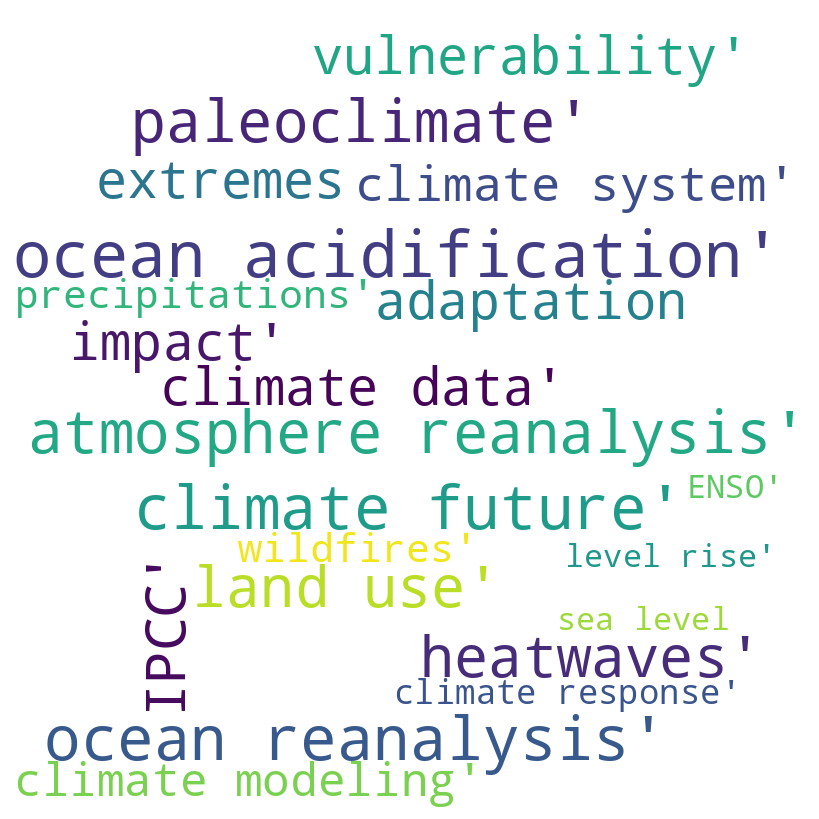

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load CSV files
mentors_df = pd.read_csv('small_mentors.csv')
mentees_df = pd.read_csv('small_mentees.csv')

# Combine the keywords from both mentors and mentees
all_keywords = pd.concat([mentors_df['keywords'], mentees_df['keywords']])

# Join all keywords into a single string
text = ' '.join(all_keywords)

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
